InterBrand 计算器

In [17]:
import numpy  as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
np.set_printoptions(precision=4)
np.set_printoptions()
warnings.filterwarnings('ignore')

AHP算法

In [18]:
def check(A):
    eigen = np.linalg.eig(A)[0]
    n = A.shape[0]
    CI = (max(eigen) - n) / (n - 1)
    RI = [0,0, 0.52, 0.89, 1.12, 1.26, 1.36, 1.41, 1.46, 1.49, 1.52, 1.54, 1.56, 1.58, 1.59]#查表
    CR = CI / RI[n - 1]
    CI = float(CI)
    CR = float(CR)
    # 若CI过小，为防止计算误差出现，取0即可
    if abs(CI) < 0.0001:
        CI = 0
    if abs(CR) < 0.0001:
        CR = 0
    print('The CI is:%.4f'%CI)
    print('The CR is:%.4f'%CR)
    if CR < 0.1:
        return 1 #通过
    else:
        return 0  # 对CR进行判断，用于下面计算权重函数。


# 计算权重函数
def count_p(A):
    q = check(A)
    n = A.shape[0]
    while q:
        weight1 = (np.sum(A / np.sum(A, axis=0), axis=1)) / n  # 算术平均权重
        weight2 = pow(np.prod(A, axis=1), 1 / n) / np.sum(pow(np.prod(A, axis=0), 1 / n))  # 几何平均权重
        eigen, F_vector = np.linalg.eig(A)
        for i in range(n):
            if eigen[i] == np.max(eigen):
                index_e = i
        best = F_vector[:, index_e]
        weight3 = best / np.sum(best)  # 特征值权重
        #print(weight1, '\n', weight2, '\n', weight3, '\n')
        return weight1,weight2,weight3.real,best.real
    else:
        print('Consistency check not pass')
        return 0, 0, 0


# 数据获取与处理
def AHP(name=r'dataassets.txt'):
    tx = open(r'%s\%s'%(os.getcwd(),name)).readlines()#tx0 目标与准则 tx1-5 方案与准则 准则层在左上角 判断矩阵
    for i in range(len(tx)):
        tx[i] = np.array(list(eval(tx[i])))
        n0 = int((np.size(tx[i])) ** 0.5)
        tx[i] = tx[i].reshape(n0, n0)
    A0 = tx[0]
    print('目标与准则\n%s'%A0)
    o_c1, o_c2, o_c3,o_b = count_p(A0)
    print('特征值权重\n%s'%o_c3)#shape(1,5)
    print('特征值向量\n%s'%o_b)
    C_P = []
    for Ai in tx[1:]:
        print('方案与准则\n%s'%Ai)
        c_p1, c_p2, c_p3,c_b = count_p(Ai)
        print('特征值权重\n%s'%c_p3)
        print('特征值向量\n%s'%np.abs(c_b))
        C_P.append(list(c_p3))
    #
    c_p = np.array(C_P)
    # print(c_p)#shape(5,3)
    score = []
    for i in range(len(c_p[0, :])):
        score.append(sum(o_c3 * c_p[:, i]))  # 计算权重
    #
    print('打分%s\n无形资产收益得分(M)%.4f'%(np.array(score),score[0]))
    return score
M=AHP(name=r'AHP.txt')[0]


目标与准则
[[1.     3.     2.    ]
 [0.3333 1.     0.5   ]
 [0.5    2.     1.    ]]
The CI is:0.0046
The CR is:0.0088
特征值权重
[0.5396 0.1634 0.297 ]
特征值向量
[0.8468 0.2565 0.466 ]
方案与准则
[[1.     2.     4.     6.    ]
 [0.5    1.     2.     3.    ]
 [0.25   0.5    1.     2.    ]
 [0.1667 0.3333 0.5    1.    ]]
The CI is:0.0035
The CR is:0.0039
特征值权重
[0.5195 0.2598 0.14   0.0808]
特征值向量
[0.8617 0.4309 0.2321 0.134 ]
方案与准则
[[1.     0.1667 0.2    0.5   ]
 [6.     1.     2.     3.    ]
 [5.     0.5    1.     2.    ]
 [2.     0.3333 0.5    1.    ]]
The CI is:0.0082
The CR is:0.0092
特征值权重
[0.0709 0.4841 0.2958 0.1491]
特征值向量
[0.12   0.8193 0.5006 0.2524]
方案与准则
[[1.     2.     5.     2.    ]
 [0.5    1.     3.     1.    ]
 [0.2    0.3333 1.     0.3333]
 [0.5    1.     3.     1.    ]]
The CI is:0.0014
The CR is:0.0016
特征值权重
[0.4488 0.2346 0.0819 0.2346]
特征值向量
[0.7956 0.4159 0.1453 0.4159]
打分[0.4252 0.289  0.1482 0.1376]
无形资产收益得分(M)0.4252


S曲线

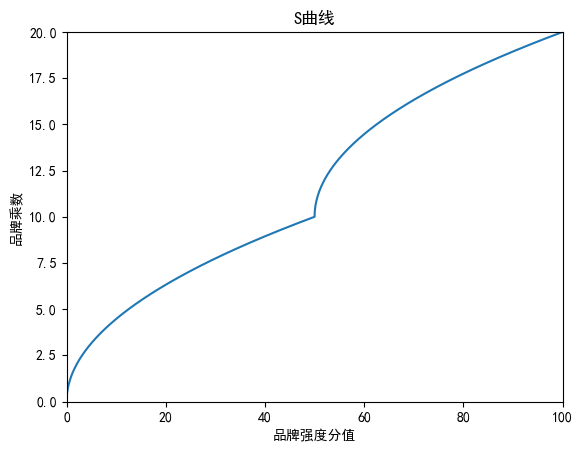

In [19]:
I_pic=np.arange(0,100,0.01)
S_pic=np.zeros(len(I_pic))
for i in range(len(I_pic)):
    if I_pic[i] <=50:
        S_pic[i]=math.sqrt(2*I_pic[i])
    else:
        S_pic[i]=math.sqrt(2*I_pic[i]-100)+10
# print(I_pic,S_pic)
plt.ylabel('品牌乘数')
plt.xlabel('品牌强度分值')
plt.title('S曲线')
plt.xlim(0,100)
plt.ylim(0,20)
plt.plot(I_pic,S_pic)
plt.show()

计算S值

In [20]:
T=77#品牌强度打分

if T <=50:
    S_score=math.sqrt(2*T)
else:
    S_score=math.sqrt(2*T-100)+10
print(S_score)

17.348469228349536


P 品牌收益

In [21]:
def get_fn(jlr,jzc,roe):#
    return (jlr-jzc*roe)
# f_a,f_b,f_c=(0,0,0)#f_c 为最近一年
def get_fn2(yylr,yxzcze,zxcbcl,t=.15):
    return (yylr-yxzcze*zxcbcl)*(1-t)
# f_a,f_b,f_c=(0,0,0)#f_c 为最近一年
def get_R(f_a,f_b,f_c):
    return (f_a+f_b*2+f_c*3)/(1+2+3)
'''trt'''
f_c=get_fn(21.99,118.07,.0546)
f_b=get_fn(28.91,106.34,.0546)
f_a=get_fn(16.16,98.32,.0546)

# f_c=get_fn2(75.02,259.1,.1038)
# f_b=get_fn2(69.55,239.2,.0998)
# f_a=get_fn2(60.34,207.9,.0903)
'''qdpj'''
# f_c=get_fn(38.05,254.95,.0759)
# f_b=get_fn(32.56,230.02,.0759)
# f_a=get_fn(23.27,206.22,.0759)

# f_c=get_fn2(118.54,414.11,.0942)
# f_b=get_fn2(110.76,377.39,.0952)
# f_a=get_fn2(112.19,340.1,.0694)


R=get_R(f_a,f_b,f_c)
print(R)
# V=R*S_wx*S*
Value=S_score*R*M
print('价值%.4f'%Value);print('与市值比:%.2f%s'%(Value/612.56*100,'%'))

17.271589000000002
价值127.4051
与市值比:20.80%


![hurun](./%E8%83%A1%E6%B6%A6.png)

在品牌建设方面：片仔癀品牌名列“2022 年胡润中国最具历史文化底蕴品牌 榜”榜首；连续八年荣登西普会肝胆用药类品牌价值首位；蝉联中华老字号品牌价 值第二（370.16 亿元）；入选“2022 凯度 BrandZ 最具价值中国品牌百强榜”第 33 位。公司蝉联“中国主板上市公司价值百强”，荣获“头部力量•中国医药高质量发 展成果企业奖”，荣膺“全国和谐劳动关系示范企业”“福建省专精特新中小企 业”等 20 多项省部以上荣誉称号，高质量发展成绩获社会各界的充分肯定。

（1）品牌优势 公司具有悠久的历史和深厚的文化底蕴，彰显其独特的品牌优势。近年来，公 司的品牌荣誉等身，硕果累累。公司以品牌价值 510 亿元蝉联“2021 年胡润品牌榜 医疗健康品牌价值榜”榜首；名列“2022 胡润中国最具历史文化底蕴品牌榜”榜 首；以品牌价值 370.19 亿元蝉联“中华老字号” 品牌第二位；以品牌价值 78.57 亿美元位列“2022 年凯度 BrandZ 最具价值中国品牌 100 强”第 33 位
云南白药280亿/231

同仁堂 105亿 占市值比22%

_____________________________________________________________________________________________________________________________________________________________
HIROSE—CNGarments评估方法

模型参数如下：

1、价格优势动因（PD）
PD=1/5*∑(0,i=-4)[(si/ci-si */ci *)*Ai/OEi]*C0


其中S,C分别表是企业销售收入和销售成本；S*和C * 表示基准企业的销售收入和销售成本；A为企业的广告宣传费用；OE为营业成本；i表示年度

2、忠诚度动因（LD）LD=(μc-σc)/μc

其中μc表示过去5年的平均销售成本；σc表示销售成本标准差

3、扩张力动因（ED）
ED=1/2{1/2∑(0,i=-1)[((SOi-SOi-1)/SOi-1)+1]+1/2∑(0,i=-1)[((SXi-SXi-1)/SXi-1)+1]}

其中，SO表示海外销售额；SX表示非本业销售额

最后，品牌价值(BV)
BV=F(PD,LD,ED)= PD/r* LD * ED

基准企业：同花顺问财ai选股：关键词医药生物-中药板块市值前20 剔除st 主营业务收入/主营业务成本(S/C)最小的企业 本文采用                      --白云山 600332.SH

![p](./%E9%80%89%E8%82%A12022.png)

In [22]:
'''pip install xlrd'''
pd.set_option('display.max_columns',None);pd.set_option('display.max_rows',None)
sh_600085_is=pd.read_excel(r'.\利润表_600085.xls',index_col=0)
sh_600332_is=pd.read_excel(r'.\利润表_600332.xls',index_col=0)
sh_600085_br=pd.read_excel(r'.\按地区分类_600085.xls',index_col=0)
r_2022_12_31=.02928#十年期国债到期收益率
sh_600085_is.head(100)


,2022年年报,2021年年报,2020年年报,2019年年报,2018年年报
上市前/上市后,上市后,上市后,上市后,上市后,上市后
报表类型,合并报表,合并报表,合并报表,合并报表,合并报表
公司类型,通用,通用,通用,通用,通用
一、营业总收入(亿元),153.72,146.03,128.26,132.77,142.09
营业收入(亿元),153.72,146.03,128.26,132.77,142.09
主营业务营业收入(亿元),152.9,145,127.25,131.81,141.18
其他业务收入(亿元),0.82,1.03,1,0.97,0.91
二、营业总成本(亿元),126.64,120.93,107.4,112.5,121.19
主营业务营业成本(亿元),78.49,76.15,67.67,70.57,75.53
营业成本(亿元),78.7,76.48,67.92,70.68,75.67


In [23]:
sh_600332_is.head(100)

,2022年年报,2021年年报,2020年年报,2019年年报,2018年年报
上市前/上市后,上市后,上市后,上市后,上市后,上市后
报表类型,合并报表,合并报表,合并报表,合并报表,合并报表
公司类型,通用,通用,通用,通用,通用
一、营业总收入(亿元),707.88,690.14,616.74,649.52,422.34
主营业务收入(亿元),705.5,687.58,614.5,646.83,419.8
二、营业总成本(亿元),665.59,648.07,585.28,614.37,399.82
主营业业务成本(亿元),574.53,557.22,511.77,526.69,321.06
税金及附加(亿元),2.98,2.98,2.58,2.98,2.63
销售费用(亿元),58.75,59.55,45.76,63.85,50.57
管理费用(亿元),22.18,20.32,18.44,19.79,16.99


In [24]:
sh_600085_br.head(100)

,2022年年报,2021年年报,2020年年报,2019年年报,2018年年报
NaN,查看,查看,查看,查看,查看
营业收入(亿元),NaN,NaN,NaN,NaN,NaN
国内,141.68,135.93,119.4,121.84,131.35
海外,11.22,9.07,7.86,9.96,9.83
营业成本(亿元),NaN,NaN,NaN,NaN,NaN
国内,75.35,73.47,65.34,67.97,72.81
海外,3.14,2.68,2.32,2.6,2.72
营业利润(亿元),NaN,NaN,NaN,NaN,NaN
国内,66.33,62.45,54.05,53.88,58.54
海外,8.08,6.39,5.53,7.36,7.11


1、价格优势动因PD

In [25]:
S_085=sh_600085_is.iloc[5,:]
# S_085=sh_600085_is.loc[['主营业务营业收入(亿元)'],:] #行名索引由于不同软件导出设置不同故不采用
C_085=sh_600085_is.iloc[8,:]
A_085=sh_600085_is.iloc[12,:]
OE_085=sh_600085_is.iloc[9,:]
S_332=sh_600332_is.iloc[4,:]
C_332=sh_600332_is.iloc[6,:]
print(S_085,'\n',C_085,'\n',A_085,'\n',OE_085,'\n',S_332,'\n',C_332)

2022年年报     152.9
2021年年报       145
2020年年报    127.25
2019年年报    131.81
2018年年报    141.18
Name: 主营业务营业收入(亿元), dtype: object 
 2022年年报    78.49
2021年年报    76.15
2020年年报    67.67
2019年年报    70.57
2018年年报    75.53
Name: 主营业务营业成本(亿元), dtype: object 
 2022年年报    9.81
2021年年报     6.9
2020年年报    5.71
2019年年报    5.52
2018年年报       9
Name: 市场拓展、业务宣传及广告费(亿元), dtype: object 
 2022年年报     78.7
2021年年报    76.48
2020年年报    67.92
2019年年报    70.68
2018年年报    75.67
Name: 营业成本(亿元), dtype: object 
 2022年年报     705.5
2021年年报    687.58
2020年年报     614.5
2019年年报    646.83
2018年年报     419.8
Name: 主营业务收入(亿元), dtype: object 
 2022年年报    574.53
2021年年报    557.22
2020年年报    511.77
2019年年报    526.69
2018年年报    321.06
Name: 主营业业务成本(亿元), dtype: object


In [26]:
S_085_np=S_085.to_numpy()
C_085_np=C_085.to_numpy()
A_085_np=A_085.to_numpy()
OE_085_np=OE_085.to_numpy()
S_332_np=S_332.to_numpy()
C_332_np=C_332.to_numpy()
print(S_085_np,'\n',C_085_np,'\n',A_085_np,'\n',OE_085_np,'\n',S_332_np,'\n',C_332_np)
PD=1/5*np.sum(((S_085_np/C_085_np)-(S_332_np/C_332_np))*A_085_np/OE_085_np)*C_085_np[0]
print('PD:%.4f'%PD)

[152.9 145 127.25 131.81 141.18] 
 [78.49 76.15 67.67 70.57 75.53] 
 [9.81 6.8999999999999995 5.71 5.52 9] 
 [78.7 76.48 67.92 70.68 75.67] 
 [705.5 687.58 614.5 646.83 419.8] 
 [574.53 557.22 511.77 526.69 321.06]
PD:5.0881


2、忠诚度因素LD

In [27]:
U_c=np.mean(C_085_np)
sigema_c=np.std(C_085_np)
LD=(U_c-sigema_c)/U_c
print('LD:%.4f'%LD)

LD:0.9462


3、扩张动力因素ED

In [28]:
SO_085=sh_600085_br.iloc[3,:]
SX_085=sh_600085_is.iloc[6,:]
print(SO_085,'\n',SX_085)
SO_085_np=SO_085.to_numpy()[0:3]
SX_085_np=SX_085.to_numpy()[0:3]
print(SO_085_np,SX_085_np)
ED=1/2*(.5*(((SO_085_np[0]-SO_085_np[1])/SO_085_np[1]+1)+((SO_085_np[1]-SO_085_np[2])/SO_085_np[2]+1))+.5*\
        (((SX_085_np[0]-SX_085_np[1])/SX_085_np[1]+1)+((SX_085_np[1]-SX_085_np[2])/SX_085_np[2]+1)))
# ED_2=.6*((S_085_np[0]-S_085_np[1])/S_085_np[1]+1)+.3*((S_085_np[1]-S_085_np[2])/S_085_np[2]+1)+\
#         .1*((S_085_np[3]-S_085_np[2])/S_085_np[2]+1)
print('ED:%.4f'%ED)

2022年年报    11.22
2021年年报     9.07
2020年年报     7.86
2019年年报     9.96
2018年年报     9.83
Name: 海外, dtype: object 
 2022年年报    0.82
2021年年报    1.03
2020年年报       1
2019年年报    0.97
2018年年报    0.91
Name: 其他业务收入(亿元), dtype: object
[11.22 9.07 7.86] [0.82 1.03 1]
ED:1.0543


In [29]:
BV=PD/r_2022_12_31*LD*ED
print('HIROSE下品牌价值：%.4f亿,占2022.12.31日市值比%.2f%s'%(BV,BV/612.56*100,'%'))

HIROSE下品牌价值：173.3560亿,占2022.12.31日市值比28.30%


方法函数：Hirose算法可以用于行业内整体品牌价值运算，将文件处理好并把证券代码输入code_list后运行即可完成计算和统计,具体制表可以手动制作也可以使用pandas做后续统计工作。

In [30]:
def hirose(path_1='./利润表_600085.xls',path_2='./按地区分类_600085.xls',path_3='./利润表_600332.xls',r_2022_12_31=.0294):
    A_is=pd.read_excel(path_1,index_col=0)
    A_br=pd.read_excel(path_2,index_col=0)
    B_is=pd.read_excel(path_3,index_col=0)
    
    S_085=A_is.iloc[5,:]
    C_085=A_is.iloc[8,:]
    A_085=A_is.iloc[12,:]
    OE_085=A_is.iloc[9,:]
    S_332=B_is.iloc[4,:]
    C_332=B_is.iloc[6,:]

    S_085_np=S_085.to_numpy()
    C_085_np=C_085.to_numpy()
    A_085_np=A_085.to_numpy()
    OE_085_np=OE_085.to_numpy()
    S_332_np=S_332.to_numpy()
    C_332_np=C_332.to_numpy()
    
    PD=1/5*np.sum(((S_085_np/C_085_np)-(S_332_np/C_332_np))*A_085_np/OE_085_np)*C_085_np[0]

    U_c=np.mean(C_085_np)
    sigema_c=np.std(C_085_np)
    LD=(U_c-sigema_c)/U_c
    
    SO_085=A_br.iloc[3,:]
    SX_085=A_is.iloc[6,:]
    SO_085_np=SO_085.to_numpy()[0:3]
    SX_085_np=SX_085.to_numpy()[0:3]
    ED=1/2*(.5*(((SO_085_np[0]-SO_085_np[1])/SO_085_np[1]+1)+((SO_085_np[1]-SO_085_np[2])/SO_085_np[2]+1))+.5*\
            (((SX_085_np[0]-SX_085_np[1])/SX_085_np[1]+1)+((SX_085_np[1]-SX_085_np[2])/SX_085_np[2]+1)))

    BV=PD/r_2022_12_31*LD*ED
    if BV>=0:
        return BV,PD,LD,ED
    else:
         print('计准错误或文件处理有误')


bid='600332'
code_list=['600085']#按照东方财富choice导出，将附注中的销售费用广告费明细放到销售费用下方，营业收入明细展开放在营收下方
brand_value={}
for i in code_list:
        bv=hirose(path_1='./利润表_%s.xls'%i,path_2='./按地区分类_%s.xls'%i,path_3='./利润表_%s.xls'%bid)
        brand_value[i]=(bv[0],bv[1],bv[2],bv[3])
print(brand_value)

{'600085': (172.64840083793663, 5.088078829535873, 0.9462405624613186, 1.054276432294933)}
